# **MBA - Aula ao Vivo 02**

**Disciplina: Visão Computacional**

**prof: Sérgio Assunção Monteiro, DSc**


# **Transformações**

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow

**Mudança de Escala**

In [ ]:
def redimensionar_imagem(percentual_scala, img):
  largura = int(img.shape[1] * percentual_scala / 100)
  altura = int(img.shape[0] * percentual_scala / 100)
  dim = (largura, altura)  
  img_redimensionada = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return img_redimensionada

In [ ]:
origem = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

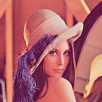

In [ ]:
img = redimensionar_imagem(20,img)
cv2_imshow(img)

**Rotação**

In [ ]:
altura, largura = img.shape[:2]
# obter as coordenadas do centro da imagem para criar a matriz de rotação 2D
centro = (largura/2, altura/2)
angulo_em_graus = 45
fator_escala=1
# Matriz de Rotação
matriz_rotacao = cv2.getRotationMatrix2D(center=centro, 
                                        angle=angulo_em_graus, 
                                        scale=fator_escala)

# Operação de Rotação
imagem_rotacionada = cv2.warpAffine(src=img, 
                                    M=matriz_rotacao,
                                    dsize=(largura, altura))


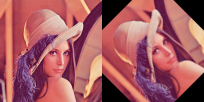

In [ ]:
img3 = cv2.hconcat([img,
                    imagem_rotacionada])
cv2_imshow(img3)

**Translação**

In [ ]:
# Obter os valores de tx e ty para translação
tx, ty = largura/4, altura/4

# Criar matriz de translação usando tx e ty
matriz_translacao = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

In [ ]:
# Operação de Translação
imagem_transladada = cv2.warpAffine(src=img, 
                                    M=matriz_translacao,
                                    dsize=(largura, altura))


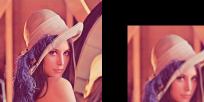

In [ ]:
img4 = cv2.hconcat([img,
                    imagem_transladada])
cv2_imshow(img4)

# **Processamento de Imagens (exemplo de aplicação de máscaras)**

**Limiares**

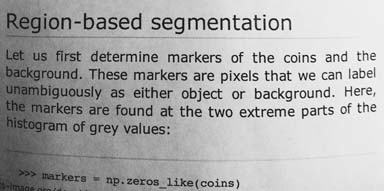

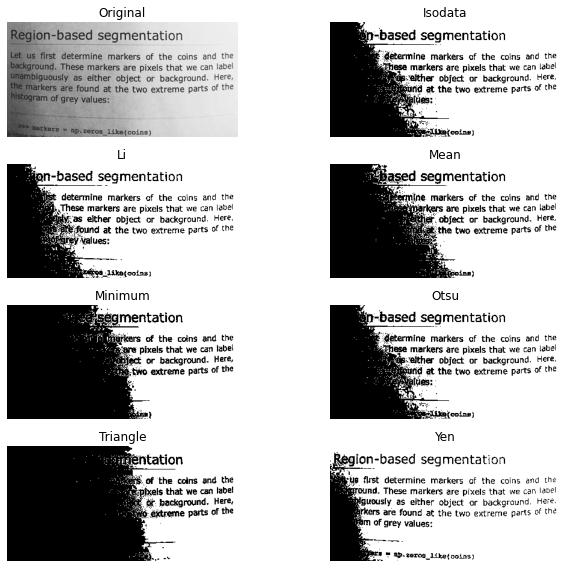

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import data
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
cv2_imshow(img)

**Limiar de Otsu**

In [ ]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def redimensionar_imagem(percentual_scala, img):
  largura = int(img.shape[1] * percentual_scala / 100)
  altura = int(img.shape[0] * percentual_scala / 100)
  dim = (largura, altura)  
  img_redimensionada = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return img_redimensionada

In [ ]:
#Obter a Imagem
img = data.camera()  
print(f'tipo = {type(img)}')

tipo = <class 'numpy.ndarray'>


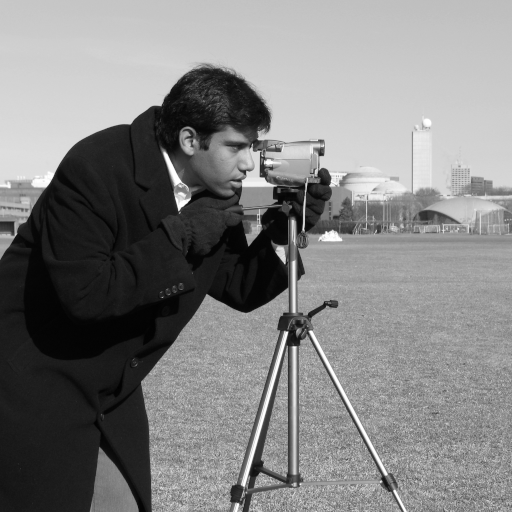

In [ ]:
cv2_imshow(img)

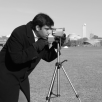

In [ ]:
percentual_scala=20
redim_imagem=redimensionar_imagem(percentual_scala, img)
cv2_imshow(redim_imagem)

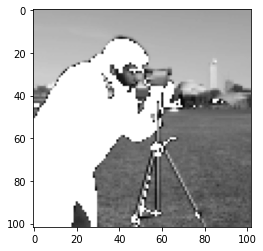

In [ ]:
mascara_de_limiares = redim_imagem < 87  
redim_imagem[mascara_de_limiares]=255  
plt.imshow(redim_imagem, cmap='gray')

In [ ]:
print(f'máscara ={mascara_de_limiares}')

máscara =[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


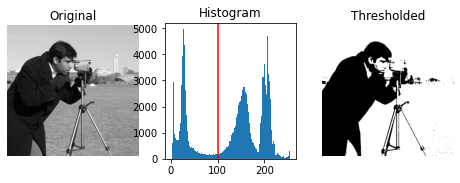

In [ ]:
from skimage.filters import threshold_otsu


image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

# **Filtro passa-alta e passa-baixa**

In [ ]:
import numpy as np
import cv2
import os
from skimage import io
from google.colab.patches import cv2_imshow

In [ ]:
def redimensionar_imagem(percentual_scala, img):
  largura = int(img.shape[1] * percentual_scala / 100)
  altura = int(img.shape[0] * percentual_scala / 100)
  dim = (largura, altura)  
  img_redimensionada = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return img_redimensionada

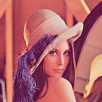

In [ ]:
origem = origem = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = redimensionar_imagem(20,img)
cv2_imshow(img)

**Passa-baixa**

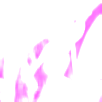

In [ ]:
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)
img_passa_baixa = cv2.filter2D(img,
                               -1,
                               kernel)
cv2_imshow(img_passa_baixa)

**Passa-alta**

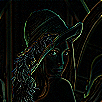

In [ ]:
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
img_passa_alta = cv2.filter2D(img,-1,kernel)
cv2_imshow(img_passa_alta)

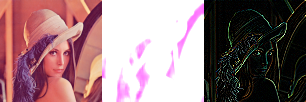

In [ ]:
img4 = cv2.hconcat([img,
                    img_passa_baixa,
                    img_passa_alta])
cv2_imshow(img4)

# **Segmentação**

In [ ]:
import numpy as np
import cv2
import os
from skimage import io
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_otsu

In [ ]:
def redimensionar_imagem(percentual_scala, img):
  largura = int(img.shape[1] * percentual_scala / 100)
  altura = int(img.shape[0] * percentual_scala / 100)
  dim = (largura, altura)  
  img_redimensionada = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return img_redimensionada

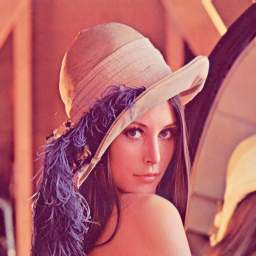

In [ ]:
#Obter a Imagem
origem = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
image = io.imread(origem) 
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
percentual_scala = 50
img = redimensionar_imagem(percentual_scala, img)
cv2_imshow(img)

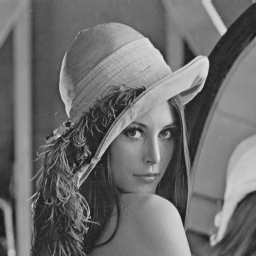

In [ ]:
#Converter para cinza
img_cinza=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(img_cinza)

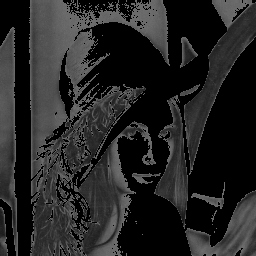

In [ ]:
limiar = threshold_otsu(img_cinza)
img_otsu  = img_cinza < limiar
img_filtrada = img_cinza*img_otsu
cv2_imshow(img_filtrada)

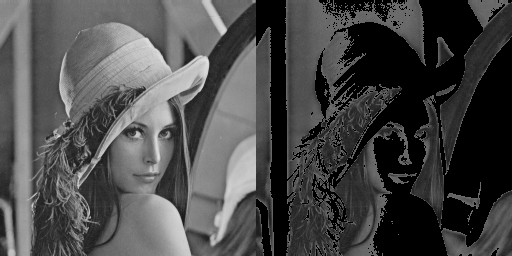

In [ ]:
img_completo = cv2.hconcat([img_cinza,
                            img_filtrada])
cv2_imshow(img_completo)